# Introduction to Python  

### Pandas Descriptive Statistics and Visualization

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading Dataframe from Excel

In [3]:
dfvote = pd.read_excel(os.path.join('../Data','CSV','votesurvey.xls'))

#### First steps examining data

In [4]:
dfvote.head(6)

,Gender,Age,Salary before Stern,Expected salary,Candidate
0,Male,27,60000,110000,Bush
1,Male,30,125000,125000,Bush
2,Male,27,50000,120000,Bush
3,Male,26,56000,100000,Bush
4,Male,27,82000,100000,Bush
5,Male,32,150000,150000,Bush


In [5]:
dfvote.tail(4)

,Gender,Age,Salary before Stern,Expected salary,Candidate
44,Female,27,56000,95000,Undecided
45,Male,28,90000,150000,Undecided
46,Female,27,65000,100000,Undecided
47,Male,29,39000,90000,Undecided


In [6]:
dfvote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               48 non-null     object
 1   Age                  48 non-null     int64 
 2   Salary before Stern  48 non-null     int64 
 3   Expected salary      48 non-null     int64 
 4   Candidate            48 non-null     object
dtypes: int64(3), object(2)
memory usage: 2.0+ KB


In [7]:
dfvote.describe()

,Age,Salary before Stern,Expected salary
count,48.000000,48.000000,48.000000
mean,27.187500,70145.833333,109166.666667
std,2.038525,37886.723427,25730.463221
min,24.000000,5000.000000,75000.000000
25%,25.750000,48750.000000,90000.000000
50%,27.000000,59500.000000,100000.000000
75%,29.000000,80500.000000,121250.000000
max,33.000000,225000.000000,180000.000000


### Plotting: Histogram  

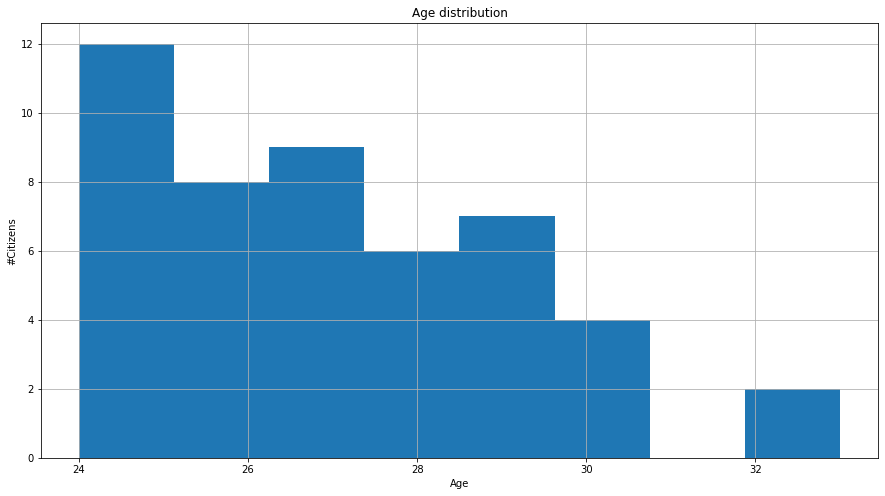

In [8]:
# Using Matplotlib calls

fig = plt.figure(figsize=(15,8))
#Create one or more subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(1,1,1)

#Variable
ax.hist(dfvote['Age'],bins = 8) # Here you can play with number of bins Labels and Tit

plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('#Citizens')
plt.grid()
plt.show()

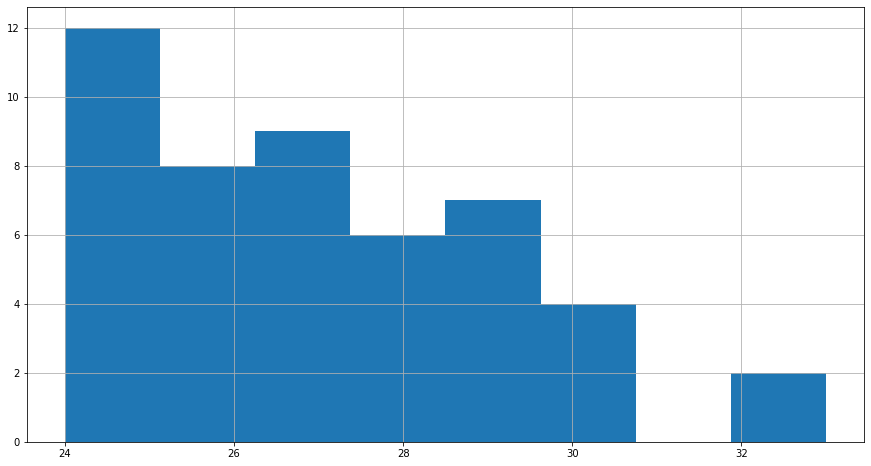

In [9]:
# Plotting within Pandas

dfvote.Age.hist(figsize=(15,8), bins=8);

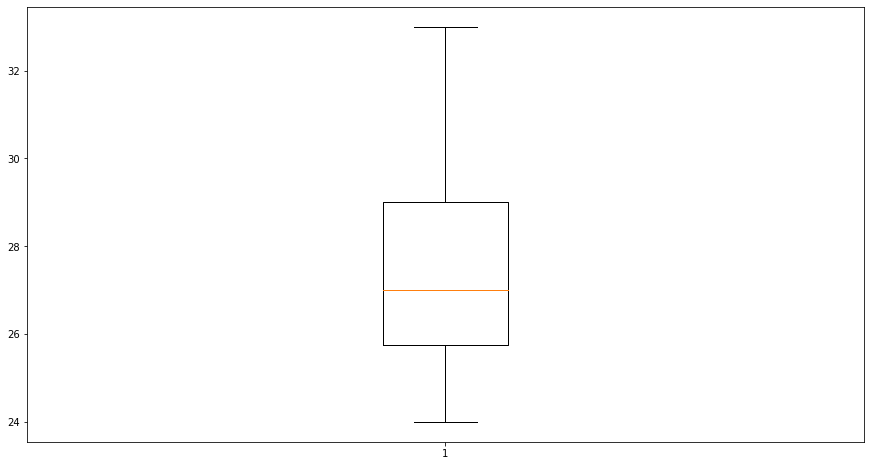

In [10]:
# Using Matplotlib calls

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)

ax.boxplot(dfvote['Age'])

plt.show()

### Box Plot  

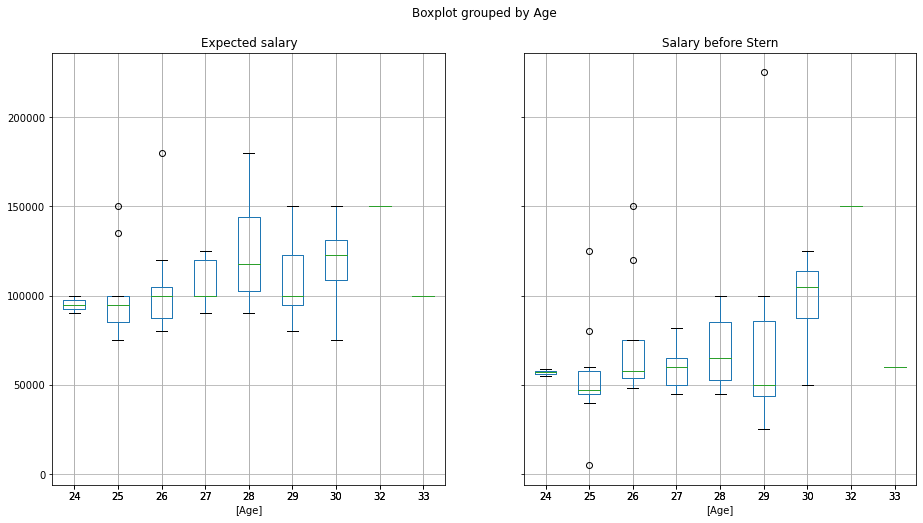

In [11]:
# Plotting within Pandas
dfvote.boxplot(by='Age', figsize=(15,8));

### Violin Plot (using Seaborn)  

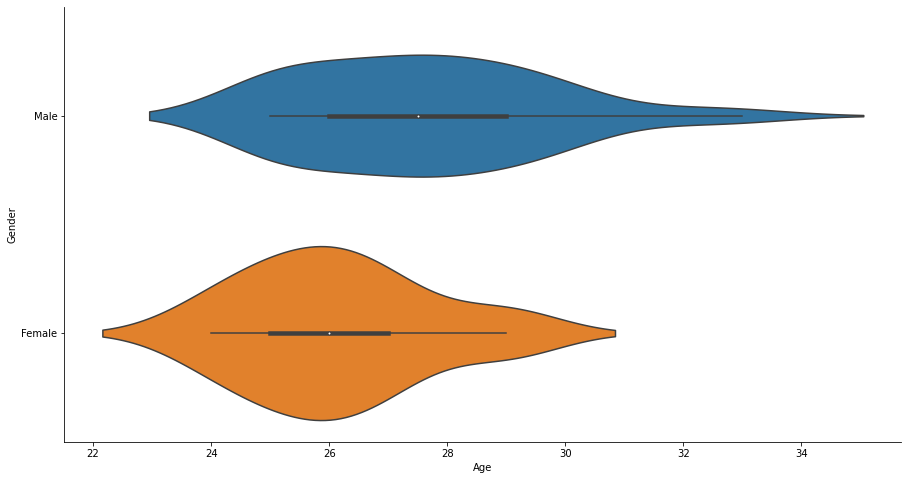

In [13]:
fig = plt.figure(figsize=(15,8))

sns.violinplot(x=dfvote['Age'], y=dfvote['Gender'])

sns.despine()

### Bar Chart  

In [14]:
dfvote.groupby('Gender').head()

,Gender,Age,Salary before Stern,Expected salary,Candidate
0,Male,27,60000,110000,Bush
1,Male,30,125000,125000,Bush
2,Male,27,50000,120000,Bush
3,Male,26,56000,100000,Bush
4,Male,27,82000,100000,Bush
6,Female,24,55000,100000,Bush
10,Female,24,59000,90000,Bush
19,Female,29,72000,120000,Gore
22,Female,26,150000,180000,Gore
23,Female,25,45000,85000,Gore


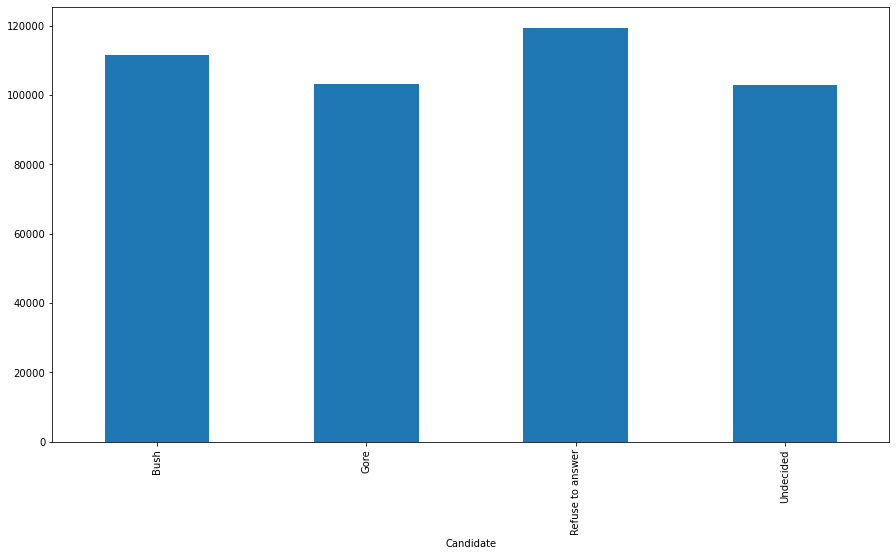

In [33]:
var = dfvote.groupby('Candidate')["Expected salary"].mean()
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,1,1)


var.plot(kind='bar');

### Line Chart  

<AxesSubplot:title={'center':'Candidate wise mean of ages'}, xlabel='Candidate', ylabel='Mean of Ages'>

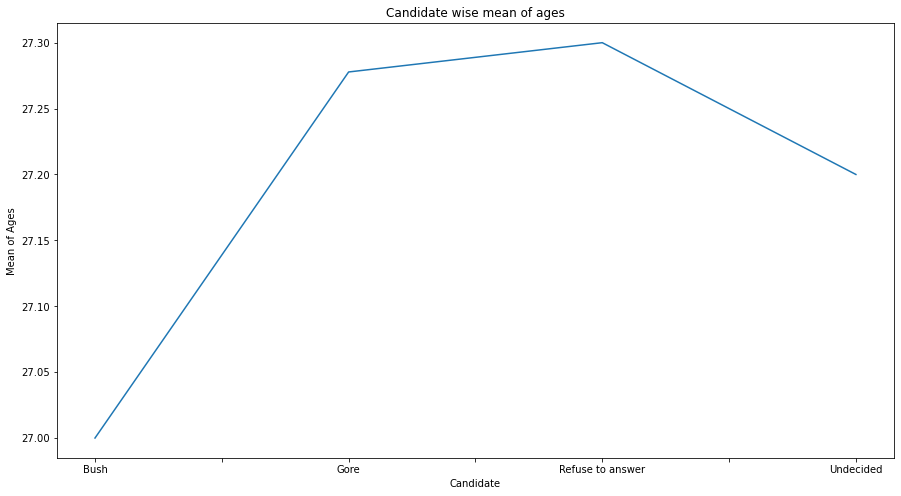

In [28]:
var = dfvote.groupby('Candidate').Age.mean()

fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,1,1)
#ax1.set_xlabel('Candidate')
ax1.set_ylabel('Mean of Ages')
ax1.set_title("Candidate wise mean of ages")

var.plot(ax=ax1, kind='line')

### Stacked Column Chart  

<AxesSubplot:xlabel='Age'>

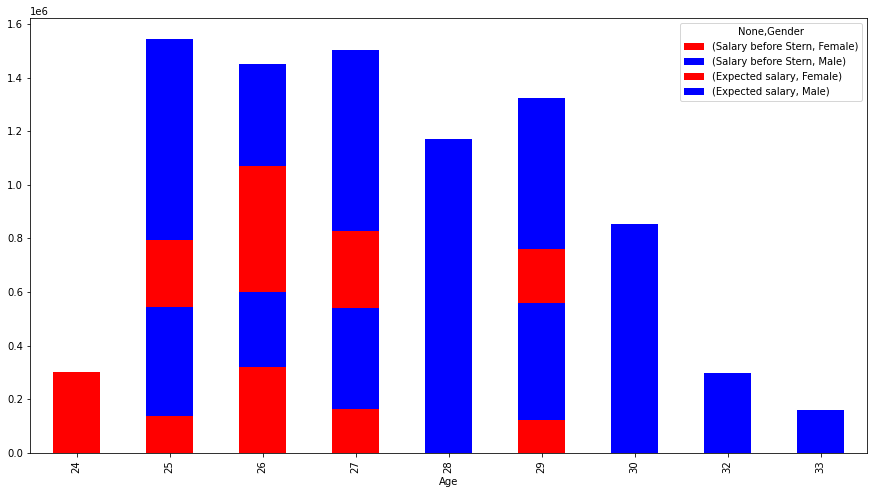

In [29]:
var = dfvote.groupby(['Age','Gender']).sum()
var.unstack().plot(kind='bar',stacked=True,  color=['red','blue'], grid=False, figsize=(15,8))

### Scatter Plot  

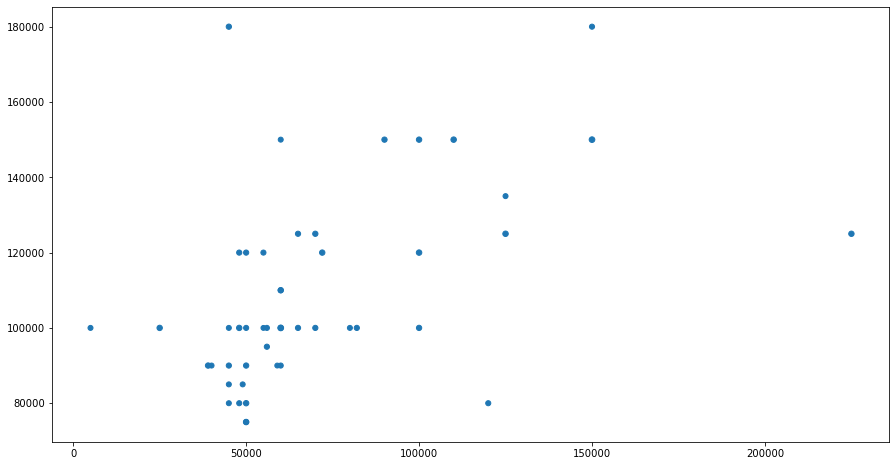

In [41]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(x=dfvote['Salary before Stern'], y=dfvote['Expected salary'], s=dfvote['Age']) #You can also add more variables here to represent color and size.
plt.show()

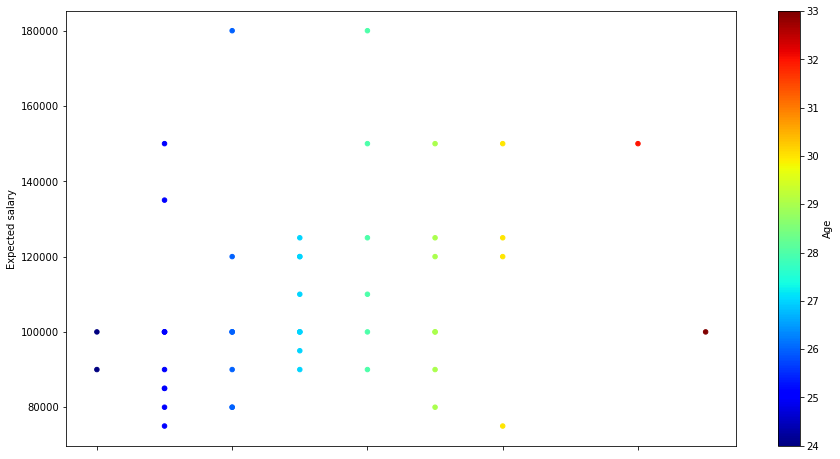

In [43]:
dfvote.plot.scatter(x='Age',y='Expected salary', c='Age', cmap='jet', figsize=(15,8));

### Bubble Plot  

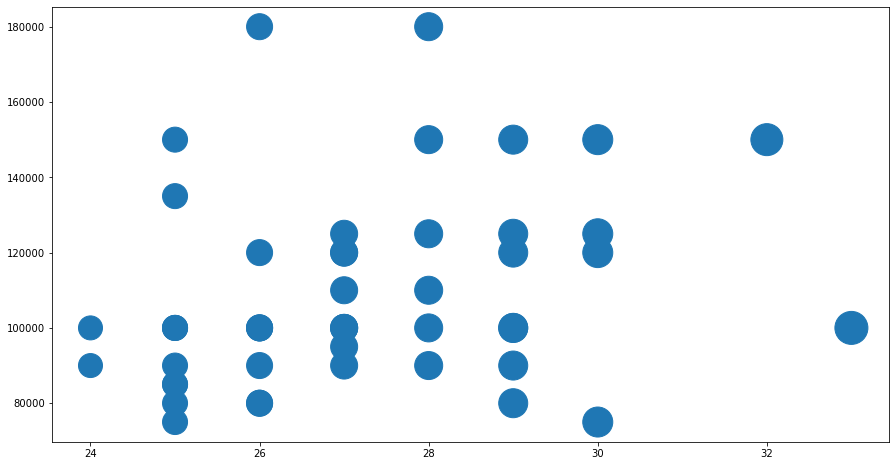

In [47]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# Added third variable income as size of the bubble
ax.scatter(dfvote['Age'],dfvote['Expected salary'], s=dfvote['Age']**2)
plt.show()

### Pie chart  

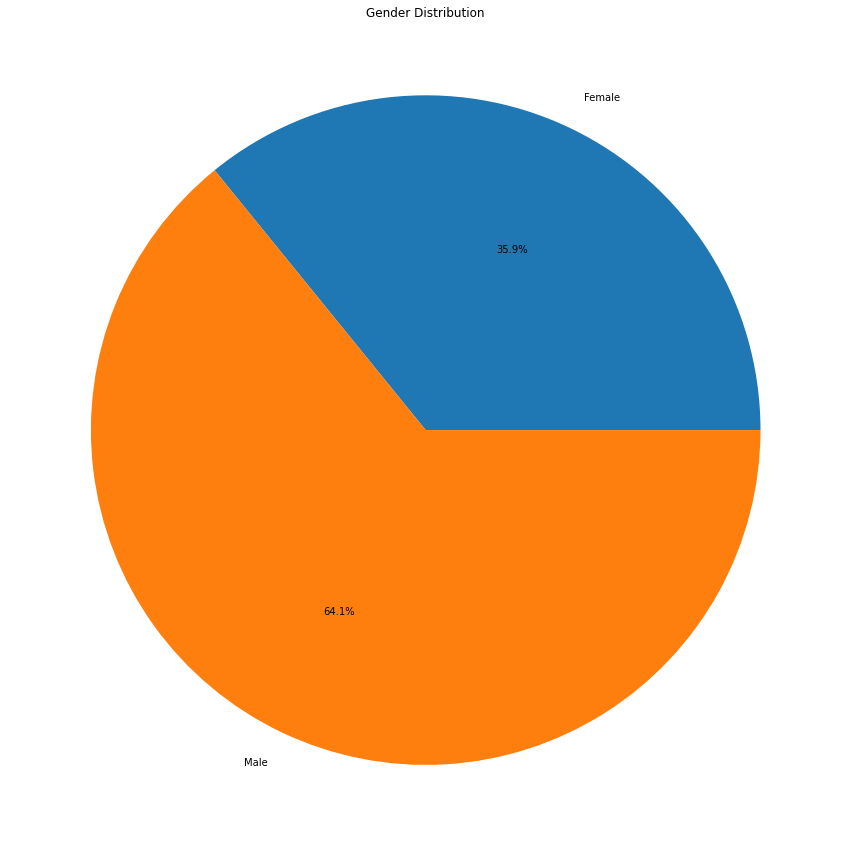

In [17]:
var=dfvote.groupby(['Gender']).sum().stack()
temp=var.unstack()
type(temp)
x_list = temp['Random']
label_list = temp.index
#The pie chart is oval by default. To make it a circle use plt.axis("equal")
fig = plt.figure(figsize=(15,15))
plt.axis("equal")
#To show the percentage of each pie slice, pass an output format to the autopctparameter 
plt.pie(x_list,labels=label_list,autopct="%1.1f%%") 
plt.title("Gender Distribution")
plt.show()

### Heat Map  

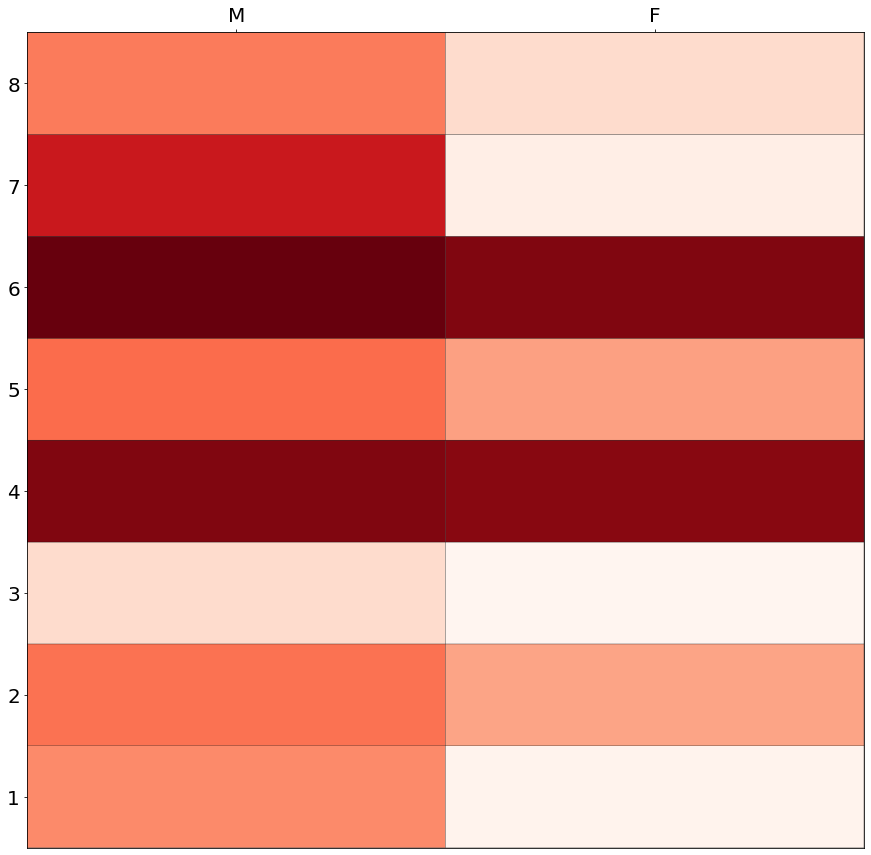

[[3.83956703e-01 1.56407904e-02]
 [4.57091220e-01 3.08052492e-01]
 [1.34093019e-01 6.67076030e-04]
 [9.07606873e-01 8.93606893e-01]
 [4.75673472e-01 3.20188565e-01]
 [9.59475447e-01 9.09254577e-01]
 [7.23793269e-01 4.40051873e-02]
 [4.29637529e-01 1.32640987e-01]]


In [18]:
#Generate a random number, you can refer your data values also
data = np.random.rand(8,2)
rows = list('12345678') #rows categories
columns = list('MF') #column categories

fig,ax=plt.subplots(figsize=(15,15))
#Advance color controls
ax.pcolor(data,cmap=plt.cm.Reds,edgecolors='k')
# Here we position the tick labels for x and y axis
ax.set_xticks(np.arange(0,2)+0.5)
ax.set_yticks(np.arange(0,8)+0.5)
ax.xaxis.tick_top()
ax.yaxis.tick_left()
#Values against each labels
ax.set_xticklabels(columns,minor=False,fontsize=20)
ax.set_yticklabels(rows,minor=False,fontsize=20)
plt.show()
print(data)

In [11]:
dfvote.sort_values(by=['Age','Expected salary'], ascending=[True, False])[0:10]

,Gender,Age,Salary before Stern,Expected salary,Candidate
6,Female,24,55000,100000,Bush
10,Female,24,59000,90000,Bush
16,Male,25,60000,150000,Gore
37,Male,25,125000,135000,Refuse to answer
14,Male,25,80000,100000,Bush
15,Male,25,45000,100000,Gore
39,Male,25,5000,100000,Refuse to answer
33,Male,25,40000,90000,Refuse to answer
23,Female,25,45000,85000,Gore
30,Female,25,49000,85000,Gore


### A Case Study

In [40]:
df = pd.read_csv('../Data/MELBOURNE_HOUSE_PRICES_LESS.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [63]:
df.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,2018-03-31,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,2018-03-31,3064,Northern Metropolitan,5833,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,h,545000.0,S,Raine,2018-03-31,3064,Northern Metropolitan,5833,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3,u,NaN,PI,Barry,2018-03-31,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council
63022,Williams Landing,1 Diadem Wy,4,h,NaN,SP,Aussie,2018-03-31,3027,Western Metropolitan,1999,17.6,Wyndham City Council


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
Suburb           63023 non-null object
Address          63023 non-null object
Rooms            63023 non-null int64
Type             63023 non-null object
Price            48433 non-null float64
Method           63023 non-null object
SellerG          63023 non-null object
Date             63023 non-null object
Postcode         63023 non-null int64
Regionname       63023 non-null object
Propertycount    63023 non-null int64
Distance         63023 non-null float64
CouncilArea      63023 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [42]:
df['Date'] = pd.to_datetime(df['Date'])
df['Type'] = df['Type'].astype('category')
df['Method'] = df['Method'].astype('category')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
Suburb           63023 non-null object
Address          63023 non-null object
Rooms            63023 non-null int64
Type             63023 non-null category
Price            48433 non-null float64
Method           63023 non-null category
SellerG          63023 non-null object
Date             63023 non-null datetime64[ns]
Postcode         63023 non-null int64
Regionname       63023 non-null object
Propertycount    63023 non-null int64
Distance         63023 non-null float64
CouncilArea      63023 non-null object
dtypes: category(2), datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 5.4+ MB


In [61]:
df['Type'].unique()

[h, t, u]
Categories (3, object): [h, t, u]

In [62]:
df['Type'].value_counts()

h    45053
u    11655
t     6315
Name: Type, dtype: int64

In [49]:
average = df['Price'].mean()
print('{:.2f}'.format(average))

997898.24


In [50]:
med = df['Price'].median()
print('{:.2f}'.format(med))

830000.00


In [51]:
standard_deviation = df['Price'].std()
print('{:.2f}'.format(standard_deviation))

593498.92


In [52]:
df.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,63023.000000,4.843300e+04,63023.000000,63023.000000,63023.000000
mean,3.110595,9.978982e+05,3125.673897,7617.728131,12.684829
std,0.957551,5.934989e+05,125.626877,4424.423167,7.592015
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,3.000000,6.200000e+05,3056.000000,4380.000000,7.000000
50%,3.000000,8.300000e+05,3107.000000,6795.000000,11.400000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,64.100000


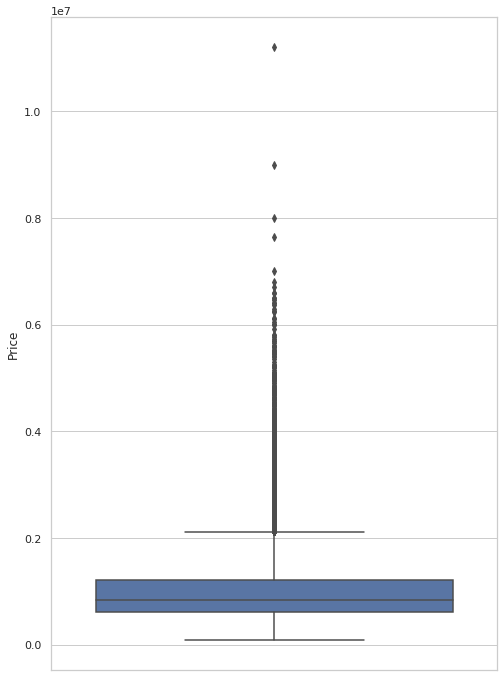

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="whitegrid")

plt.figure(figsize=(8,12))
ax = sns.boxplot(x='Price', data=df, orient="v")

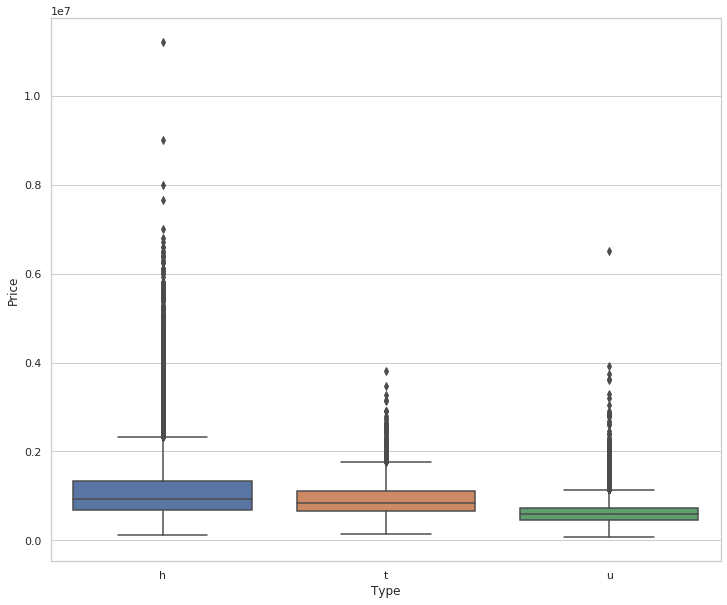

In [59]:
plt.figure(figsize=(12,10))
ax = sns.boxplot(x='Type', y='Price', data=df, orient="v")

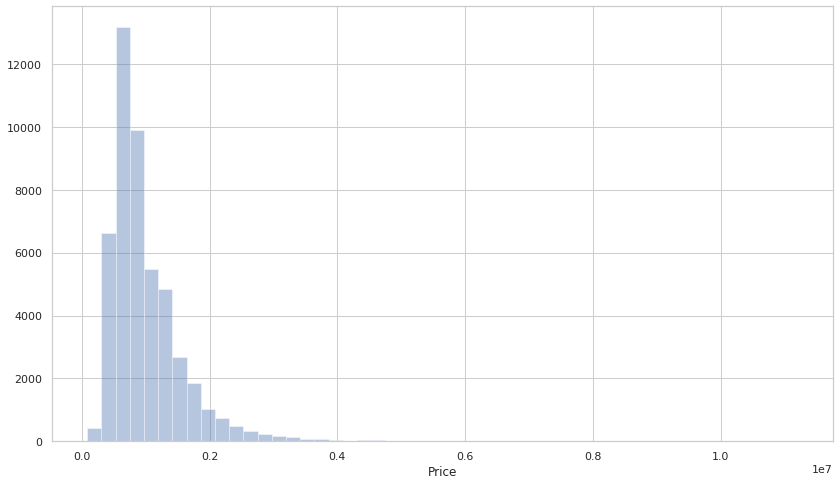

In [60]:
filter_data = df.dropna(subset=['Price'])
plt.figure(figsize=(14,8))

sns.distplot(filter_data['Price'], kde=False)

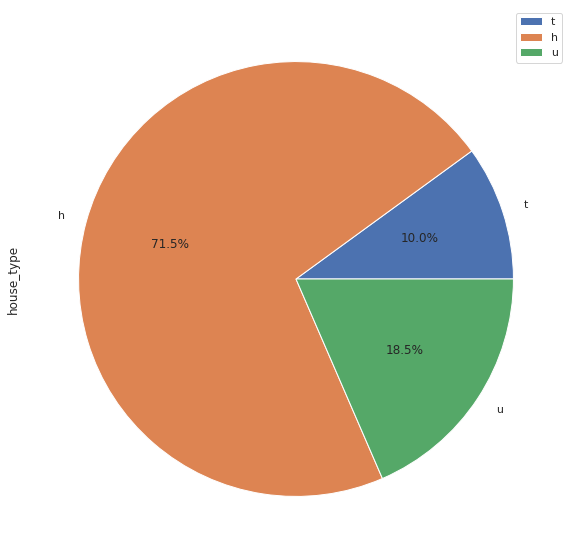

In [64]:
type_counts = df['Type'].value_counts()

df2 = pd.DataFrame({'house_type': type_counts}, index = ['t', 'h', 'u'])

df2.plot.pie(y='house_type', figsize=(10,10), autopct='%1.1f%%')

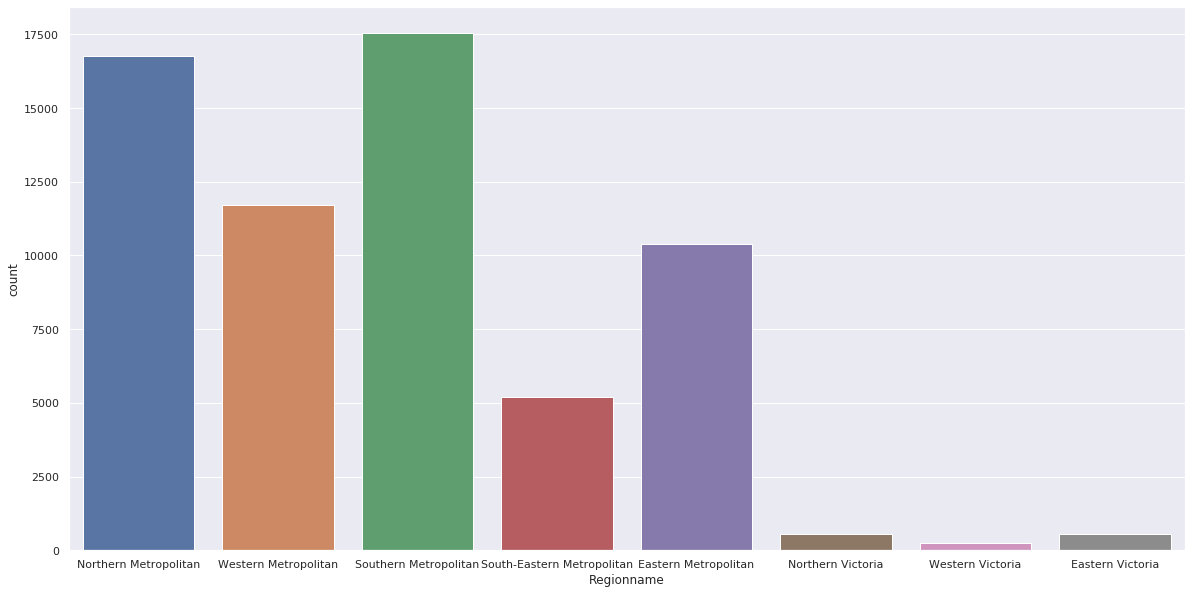

In [65]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))

ax = sns.countplot(x='Regionname', data=df)

In [73]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,2017-01-04,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,2017-01-04,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


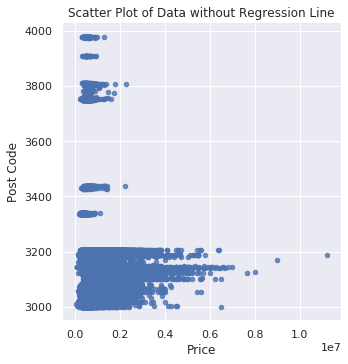

In [85]:
sns.lmplot('Price', 'Postcode', data=df, fit_reg=False, scatter_kws={"marker": "D", "s": 20}) 
plt.title('Scatter Plot of Data without Regression Line')
plt.xlabel('Price')
plt.ylabel('Post Code')
plt.show()